### First some pip installs you may need to run code

In [1]:
pip install -u pandas-datareader

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\dan.marks\Anaconda3\envs\mlenv\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [2]:
pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [4]:
# import librarys
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
plt.style.use('seaborn')

## Getting Data from Yahoo Finance

In [5]:
#get Microsoft stock price
msftdf = web.DataReader('msft', data_source='yahoo', start='2019-01-01', end='2021-05-01')

msftdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,101.750000,98.940002,99.550003,101.120003,35329300.0,98.375481
2019-01-03,100.190002,97.199997,100.099998,97.400002,42579100.0,94.756454
2019-01-04,102.510002,98.930000,99.720001,101.930000,44060600.0,99.163513
2019-01-07,103.269997,100.980003,101.639999,102.059998,35656100.0,99.289970
2019-01-08,103.970001,101.709999,103.040001,102.800003,31514400.0,100.009888
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


In [6]:
#get Facebook stock price
fbdf = web.DataReader('FB', data_source='yahoo', start='2019-01-01', end='2021-05-01')

fbdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003
2019-01-08,143.139999,139.539993,139.889999,142.529999,26263800,142.529999
...,...,...,...,...,...,...
2021-04-26,305.799988,301.559998,303.339996,303.040009,16172600,303.040009
2021-04-27,305.339996,301.109985,304.279999,303.570007,15309300,303.570007
2021-04-28,310.920013,305.369995,307.359985,307.100006,33907200,307.100006


In [7]:
#get Apple stock price
aapldf = web.DataReader('AAPL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

aapldf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.439735
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.610851
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,36.088364
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,36.008041
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.694466
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.491562
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,134.162109
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,133.353485


In [8]:
#get Google stock price
googdf = web.DataReader('GOOGL', data_source='yahoo', start='2019-01-01', end='2021-05-01')

googdf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995
...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039


In [9]:
#get Amazon stock price
amzndf = web.DataReader('AMZN', data_source='yahoo', start='2019-01-01', end='2021-05-01')

amzndf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1553.359985,1460.930054,1465.199951,1539.130005,7983100,1539.130005
2019-01-03,1538.000000,1497.109985,1520.010010,1500.280029,6975600,1500.280029
2019-01-04,1594.000000,1518.310059,1530.000000,1575.390015,9182600,1575.390015
2019-01-07,1634.560059,1589.189941,1602.310059,1629.510010,7993200,1629.510010
2019-01-08,1676.609985,1616.609985,1664.689941,1656.579956,8881400,1656.579956
...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000


## Visualizing the Data

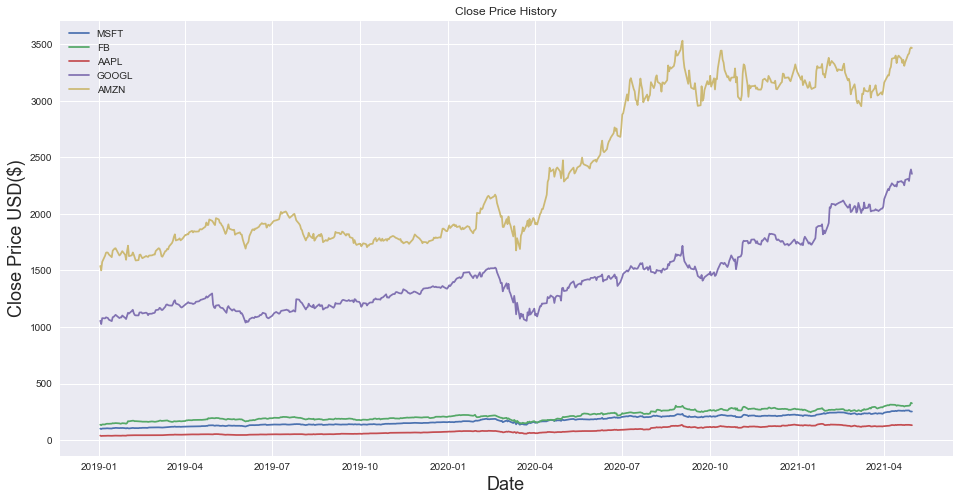

In [10]:
#plot close prices
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(msftdf['Close'], label='MSFT')
plt.plot(fbdf['Close'], label='FB')
plt.plot(aapldf['Close'], label='AAPL')
plt.plot(googdf['Close'], label='GOOGL')
plt.plot(amzndf['Close'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

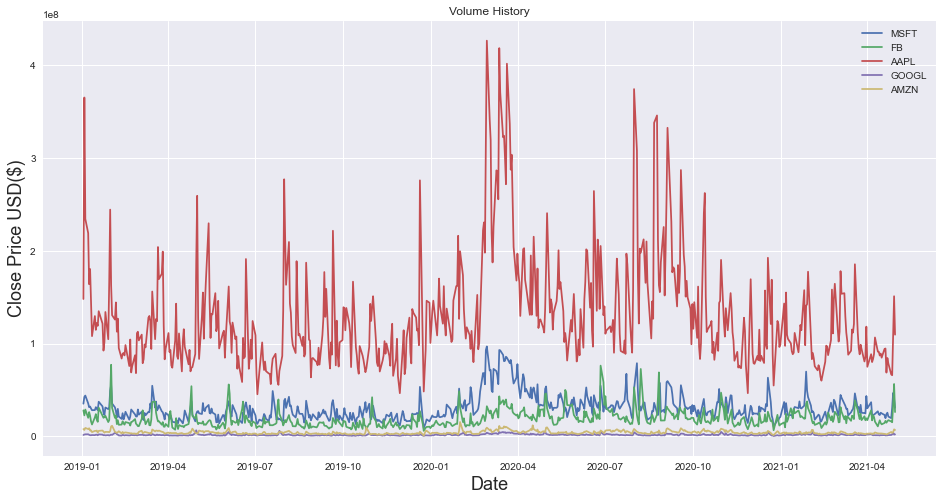

In [11]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(msftdf['Volume'], label='MSFT')
plt.plot(fbdf['Volume'], label='FB')
plt.plot(aapldf['Volume'], label='AAPL')
plt.plot(googdf['Volume'], label='GOOGL')
plt.plot(amzndf['Volume'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

In [12]:
#creating new column = 'Total Traded' which is close price * volume 

In [13]:
msftdf['Total Traded'] = msftdf['Close']*msftdf['Volume']
fbdf['Total Traded'] = fbdf['Close']*fbdf['Volume']
aapldf['Total Traded'] = aapldf['Close']*aapldf['Volume']
amzndf['Total Traded'] = amzndf['Close']*amzndf['Volume']
googdf['Total Traded'] = googdf['Close']*googdf['Volume']

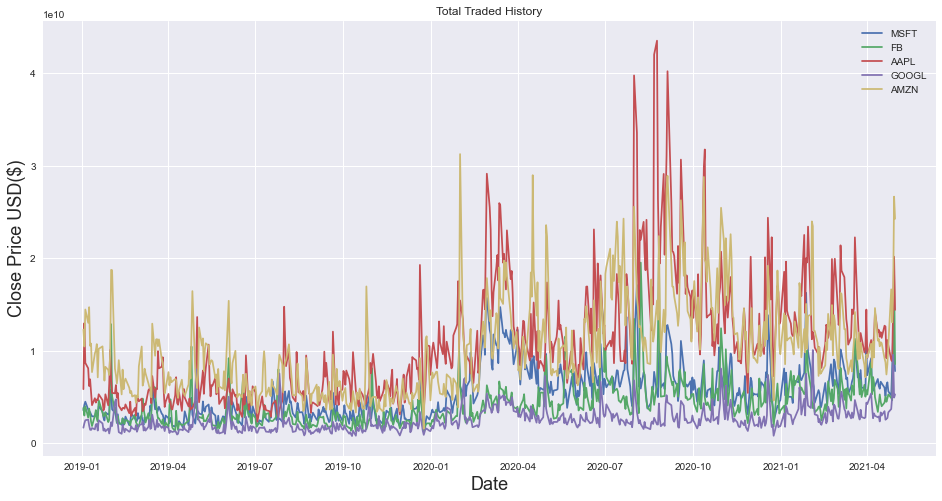

In [14]:
plt.figure(figsize=(16,8))
plt.title('Total Traded History')
plt.plot(msftdf['Total Traded'], label='MSFT')
plt.plot(fbdf['Total Traded'], label='FB')
plt.plot(aapldf['Total Traded'], label='AAPL')
plt.plot(googdf['Total Traded'], label='GOOGL')
plt.plot(amzndf['Total Traded'], label='AMZN')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.legend()

##### Before we look at 1 stock change 'ticker'df name to be df so code is reusable with minimal changes

In [15]:
# INPUT TICKER DF TO BE CHANGED TO 'df' for future code!
df = googdf

In [16]:
df

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2019-01-02,1060.790039,1025.280029,1027.199951,1054.680054,1593400,1054.680054,1.680527e+09
2019-01-03,1066.260010,1022.369995,1050.670044,1025.469971,2098000,1025.469971,2.151436e+09
2019-01-04,1080.000000,1036.859985,1042.560059,1078.069946,2301100,1078.069946,2.480747e+09
2019-01-07,1082.699951,1062.640015,1080.969971,1075.920044,2372300,1075.920044,2.552405e+09
2019-01-08,1093.349976,1068.349976,1086.000000,1085.369995,1770700,1085.369995,1.921865e+09
...,...,...,...,...,...,...,...
2021-04-26,2324.530029,2297.320068,2304.520020,2309.929932,1601900,2309.929932,3.700277e+09
2021-04-27,2318.449951,2286.159912,2317.629883,2290.979980,2219300,2290.979980,5.084372e+09
2021-04-28,2431.379883,2353.219971,2392.500000,2359.040039,4055300,2359.040039,9.566615e+09


## Take a look at the Data!

In [17]:
from statsmodels.tsa.stattools import adfuller
#ADF test will tell us if model is stationary. If p-value is greater than .05 we can conclude it is not stationary

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.6075638509629798
p-value: 0.9878005888181302


In [18]:
from statsmodels.graphics.tsaplots import plot_acf

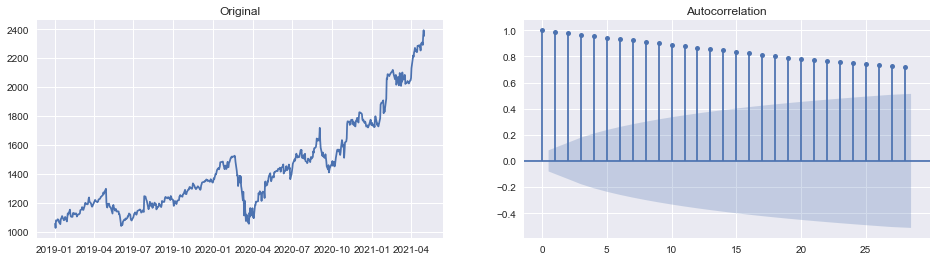

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

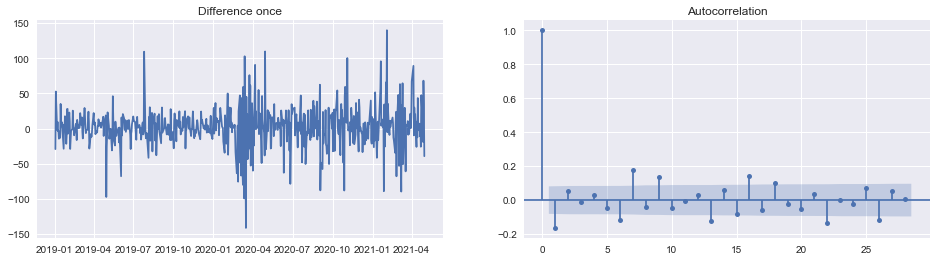

In [20]:
# check if we difference once

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

##### We can conclude the data how many times the data should be differenced by the longest line in the auto correlation

In [21]:
from pmdarima.arima.utils import ndiffs

In [22]:
#another function to double check # of difference
ndiffs(df.Close, test='adf')

1

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

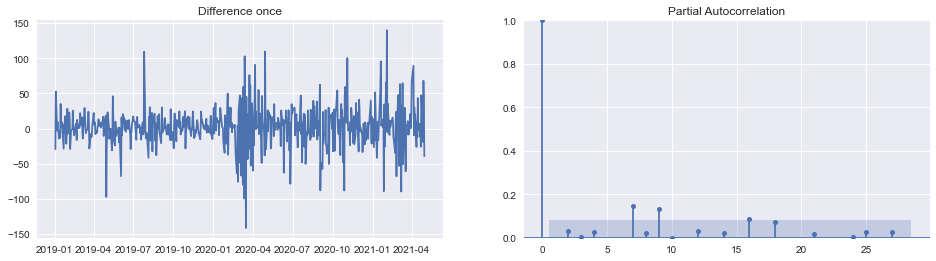

In [24]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

#we see 7 and 9 can be used as p terms

In [25]:
#Finding q. q is order of the moving average. The # of lagged forecast errors that should go into ARIMA model

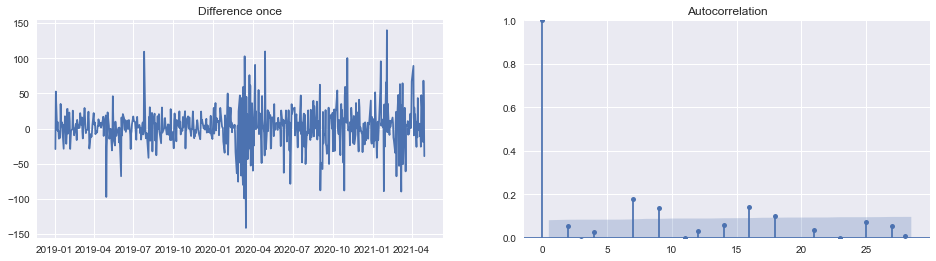

In [26]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

#we can see our q term could be 2, 6, 9

## Getting started with ARIMA

In [27]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [35]:
#get close data alone

df = df[['Close']].copy()
df.info

<bound method DataFrame.info of                   Close
Date                   
2019-01-02  1054.680054
2019-01-03  1025.469971
2019-01-04  1078.069946
2019-01-07  1075.920044
2019-01-08  1085.369995
...                 ...
2021-04-26  2309.929932
2021-04-27  2290.979980
2021-04-28  2359.040039
2021-04-29  2392.760010
2021-04-30  2353.500000

[587 rows x 1 columns]>

In [36]:
#split data into test and split at .80 (of )
y_train = df.iloc[:round(df.shape[0]*.80)]
y_test = df.iloc[round(df.shape[0]*.80):]

In [37]:
y_train.tail(10)

,Close
Date,
2020-10-28,1510.800049
2020-10-29,1556.880005
2020-10-30,1616.109985
2020-11-02,1624.319946
2020-11-03,1645.660034
2020-11-04,1745.849976
2020-11-05,1762.500000
2020-11-06,1759.729980
2020-11-09,1761.420044


In [38]:
y_test.head(10)

,Close
Date,
2020-11-11,1747.229980
2020-11-12,1742.819946
2020-11-13,1772.260010
2020-11-16,1774.030029
2020-11-17,1761.660034
2020-11-18,1740.640015
2020-11-19,1758.569946
2020-11-20,1736.380005
2020-11-23,1727.560059


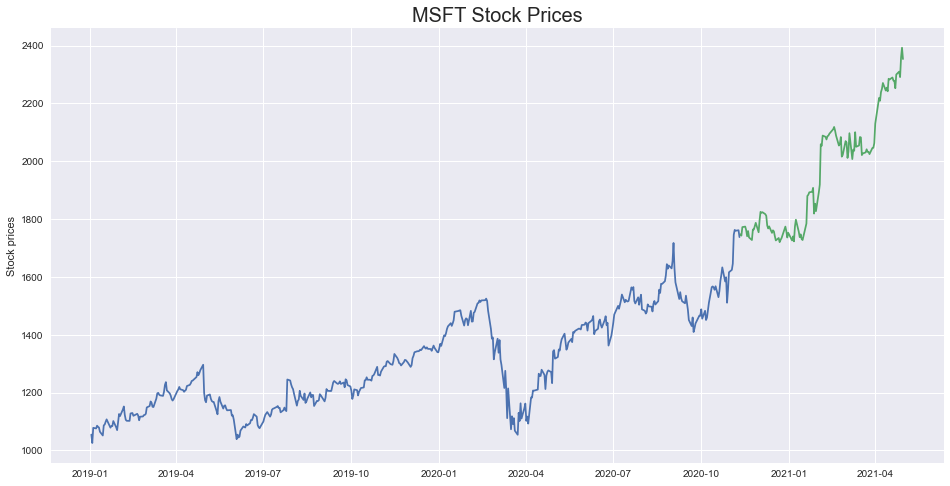

In [39]:
#plot train and test
plt.figure(figsize=(16,8))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Actual')
plt.ylabel("Stock prices")
plt.title('MSFT Stock Prices',fontsize=20)
plt.show()

In [40]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-11-11 00:00:00
end: 2021-04-30 00:00:00


In [41]:
y_test.shape

(117, 1)

In [42]:
y_train.shape

(470, 1)

In [43]:
arima = ARIMA(y_train,order=(7,1,2)).fit(disp=False)
y_arima = arima.predict(470,586,typ='levels')
y_arima.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [44]:
#Check MSE of model
arima_mse = mse(y_arima,y_test)

mse(y_arima,y_test)


32196.9032478872

In [45]:
arima_df = pd.DataFrame(y_arima)

arima_df

,0
Date,
2020-11-11,1750.161341
2020-11-12,1745.652468
2020-11-13,1765.856200
2020-11-16,1766.806324
2020-11-17,1774.231701
...,...
2021-04-26,1948.867257
2021-04-27,1950.413400
2021-04-28,1951.959557


In [46]:
arima_df['Actual'] = y_test['Close'].values

arima_df

,0,Actual
Date,,
2020-11-11,1750.161341,1747.229980
2020-11-12,1745.652468,1742.819946
2020-11-13,1765.856200,1772.260010
2020-11-16,1766.806324,1774.030029
2020-11-17,1774.231701,1761.660034
...,...,...
2021-04-26,1948.867257,2309.929932
2021-04-27,1950.413400,2290.979980
2021-04-28,1951.959557,2359.040039


In [47]:
arima_df.columns=['Forecasted', 'Actual']

arima_df

,Forecasted,Actual
Date,,
2020-11-11,1750.161341,1747.229980
2020-11-12,1745.652468,1742.819946
2020-11-13,1765.856200,1772.260010
2020-11-16,1766.806324,1774.030029
2020-11-17,1774.231701,1761.660034
...,...,...
2021-04-26,1948.867257,2309.929932
2021-04-27,1950.413400,2290.979980
2021-04-28,1951.959557,2359.040039


In [48]:
arima_df['MPE'] = np.mean((arima_df['Forecasted'] - arima_df['Actual'] )/arima_df['Actual']) 

arima_df

,Forecasted,Actual,MPE
Date,,,
2020-11-11,1750.161341,1747.229980,-0.044272
2020-11-12,1745.652468,1742.819946,-0.044272
2020-11-13,1765.856200,1772.260010,-0.044272
2020-11-16,1766.806324,1774.030029,-0.044272
2020-11-17,1774.231701,1761.660034,-0.044272
...,...,...,...
2021-04-26,1948.867257,2309.929932,-0.044272
2021-04-27,1950.413400,2290.979980,-0.044272
2021-04-28,1951.959557,2359.040039,-0.044272


In [49]:
#calculate MPE score

arima_mpe = np.mean(arima_df['MPE'])

arima_mpe


-0.04427223605850993

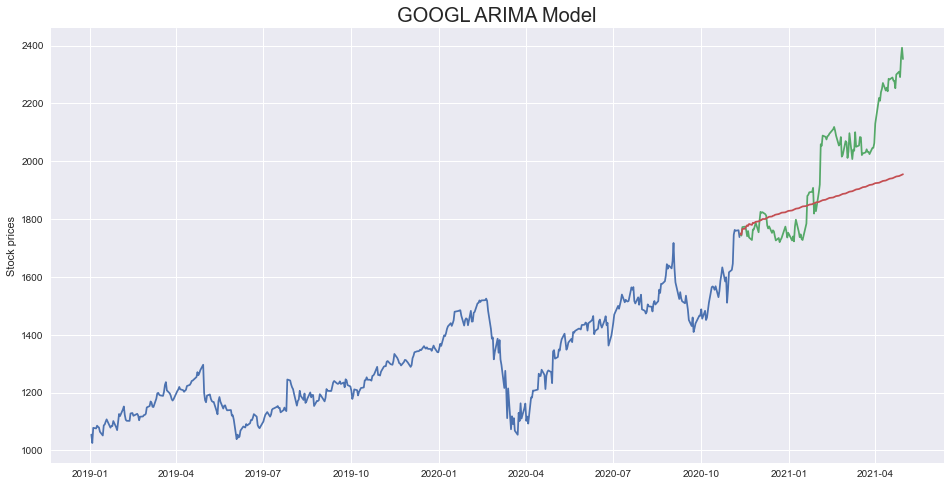

In [50]:
#Plot ARIMA model

plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arima,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('GOOGL ARIMA Model',fontsize=20)
#save fig
plt.savefig("ARIMA_GOOGL.png",)

plt.show()

## Checking ARMA Model

In [51]:
from statsmodels.tsa.arima_model import ARMA

In [52]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(470,586)
y_arma.index = y_test.index

C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dan.marks\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but 

In [53]:
#Check MSE of model
arma_mse = mse(y_arma,y_test)

mse(y_arma,y_test)

143617.8272702334

In [54]:
arma_df = pd.DataFrame(y_arma)

arma_df

,0
Date,
2020-11-11,1739.898485
2020-11-12,1738.430753
2020-11-13,1736.968580
2020-11-16,1735.511947
2020-11-17,1734.060831
...,...
2021-04-26,1605.729529
2021-04-27,1604.770031
2021-04-28,1603.814167


In [55]:
arma_df['Actual'] = y_test['Close'].values

arma_df

,0,Actual
Date,,
2020-11-11,1739.898485,1747.229980
2020-11-12,1738.430753,1742.819946
2020-11-13,1736.968580,1772.260010
2020-11-16,1735.511947,1774.030029
2020-11-17,1734.060831,1761.660034
...,...,...
2021-04-26,1605.729529,2309.929932
2021-04-27,1604.770031,2290.979980
2021-04-28,1603.814167,2359.040039


In [56]:
arma_df.columns=['Forecasted', 'Actual']

arma_df

,Forecasted,Actual
Date,,
2020-11-11,1739.898485,1747.229980
2020-11-12,1738.430753,1742.819946
2020-11-13,1736.968580,1772.260010
2020-11-16,1735.511947,1774.030029
2020-11-17,1734.060831,1761.660034
...,...,...
2021-04-26,1605.729529,2309.929932
2021-04-27,1604.770031,2290.979980
2021-04-28,1603.814167,2359.040039


In [57]:
arma_df['MPE'] = np.mean((arma_df['Forecasted'] - arma_df['Actual'] )/arma_df['Actual']) 

arma_df

,Forecasted,Actual,MPE
Date,,,
2020-11-11,1739.898485,1747.229980,-0.141875
2020-11-12,1738.430753,1742.819946,-0.141875
2020-11-13,1736.968580,1772.260010,-0.141875
2020-11-16,1735.511947,1774.030029,-0.141875
2020-11-17,1734.060831,1761.660034,-0.141875
...,...,...,...
2021-04-26,1605.729529,2309.929932,-0.141875
2021-04-27,1604.770031,2290.979980,-0.141875
2021-04-28,1603.814167,2359.040039,-0.141875


In [58]:
#calculate MPE score

arma_mpe = np.mean(arma_df['MPE'])

arma_mpe

-0.14187534188409312

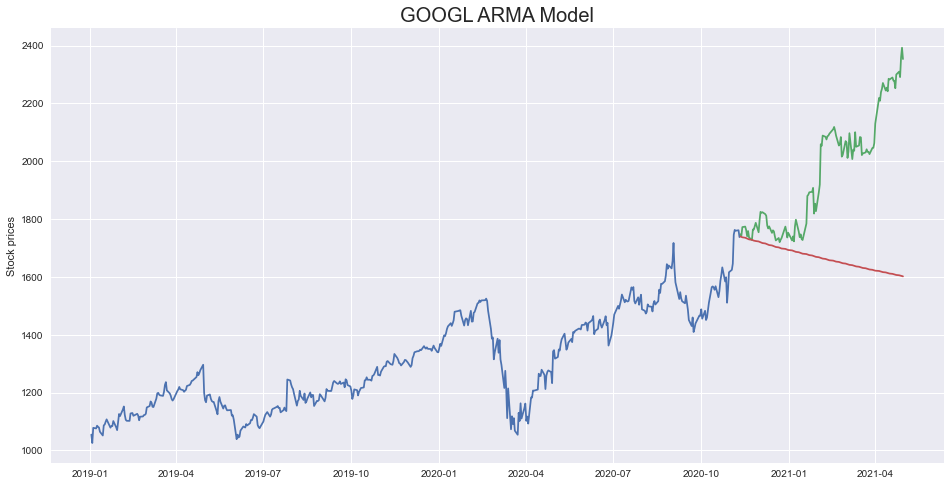

In [59]:
plt.figure(figsize=(16,8))
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Actual')
plt.plot(y_arma,label='ARIMA Predict')
plt.ylabel("Stock prices")
plt.title('GOOGL ARMA Model',fontsize=20)
#save fig
plt.savefig("ARMA_GOOGL.png",)

plt.show()

### Visualize results

In [60]:
mse_df = pd.DataFrame({'Ticker':['GOOGL', 'GOOGL'],
                       'Model':['ARIMA', 'ARMA'],
                    'MSE Score':[arima_mse, arma_mse,],   
                    'MPE Score':[arima_mpe, arma_mpe]})
                   
mse_df

,Ticker,Model,MSE Score,MPE Score
0,GOOGL,ARIMA,32196.903248,-0.044272
1,GOOGL,ARMA,143617.827270,-0.141875


In [61]:
#export MSE table

mse_df.to_csv('GOOGL_MSE.csv')